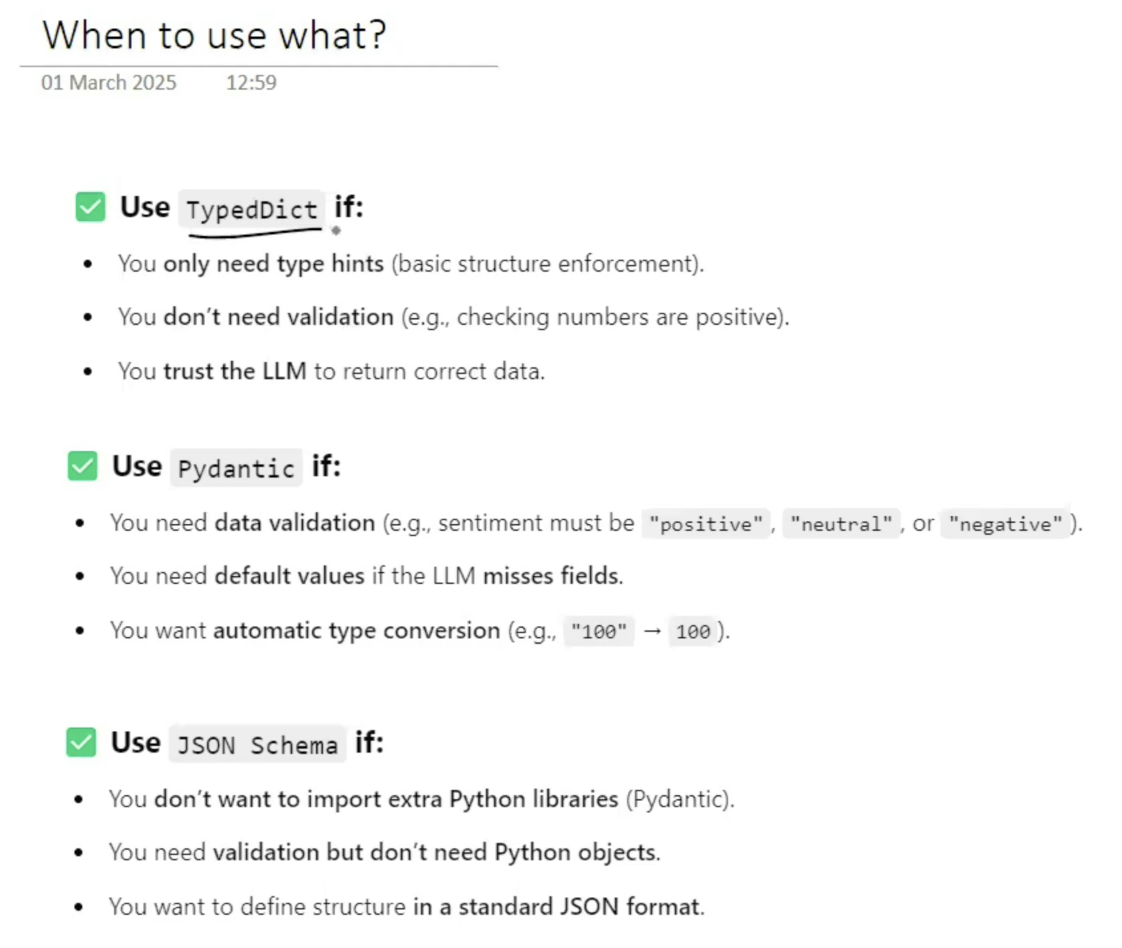

Use Case-------------------------| TypedDict | Pydantic |

Lightweight, static type hinting----|✅----------| ❌------|

Runtime type validation-----------|❌----------| ✅------|

Data parsing/conversion----------|❌----------| ✅------|

No external dependencies--------|✅----------| ❌------|

# 1. TypedDict

* ✅ Lightweight way to define dictionary schemas (structure/type hints).

* 📦 No validation at runtime — only helps during type checking (e.g., in IDEs or with mypy).

* ❌ Can't enforce types at runtime.

### Demo TypedDict

In [ ]:
from typing import TypedDict

class Person(TypedDict):

    name: str
    age: int

new_person: Person = {'name':'Aadish', 'age':'20'}

print(new_person)

{'name': 'nitish', 'age': '35'}


### Unfortunatelly, OllamaLLM does not currently support .with_structured_output() in LangChain.

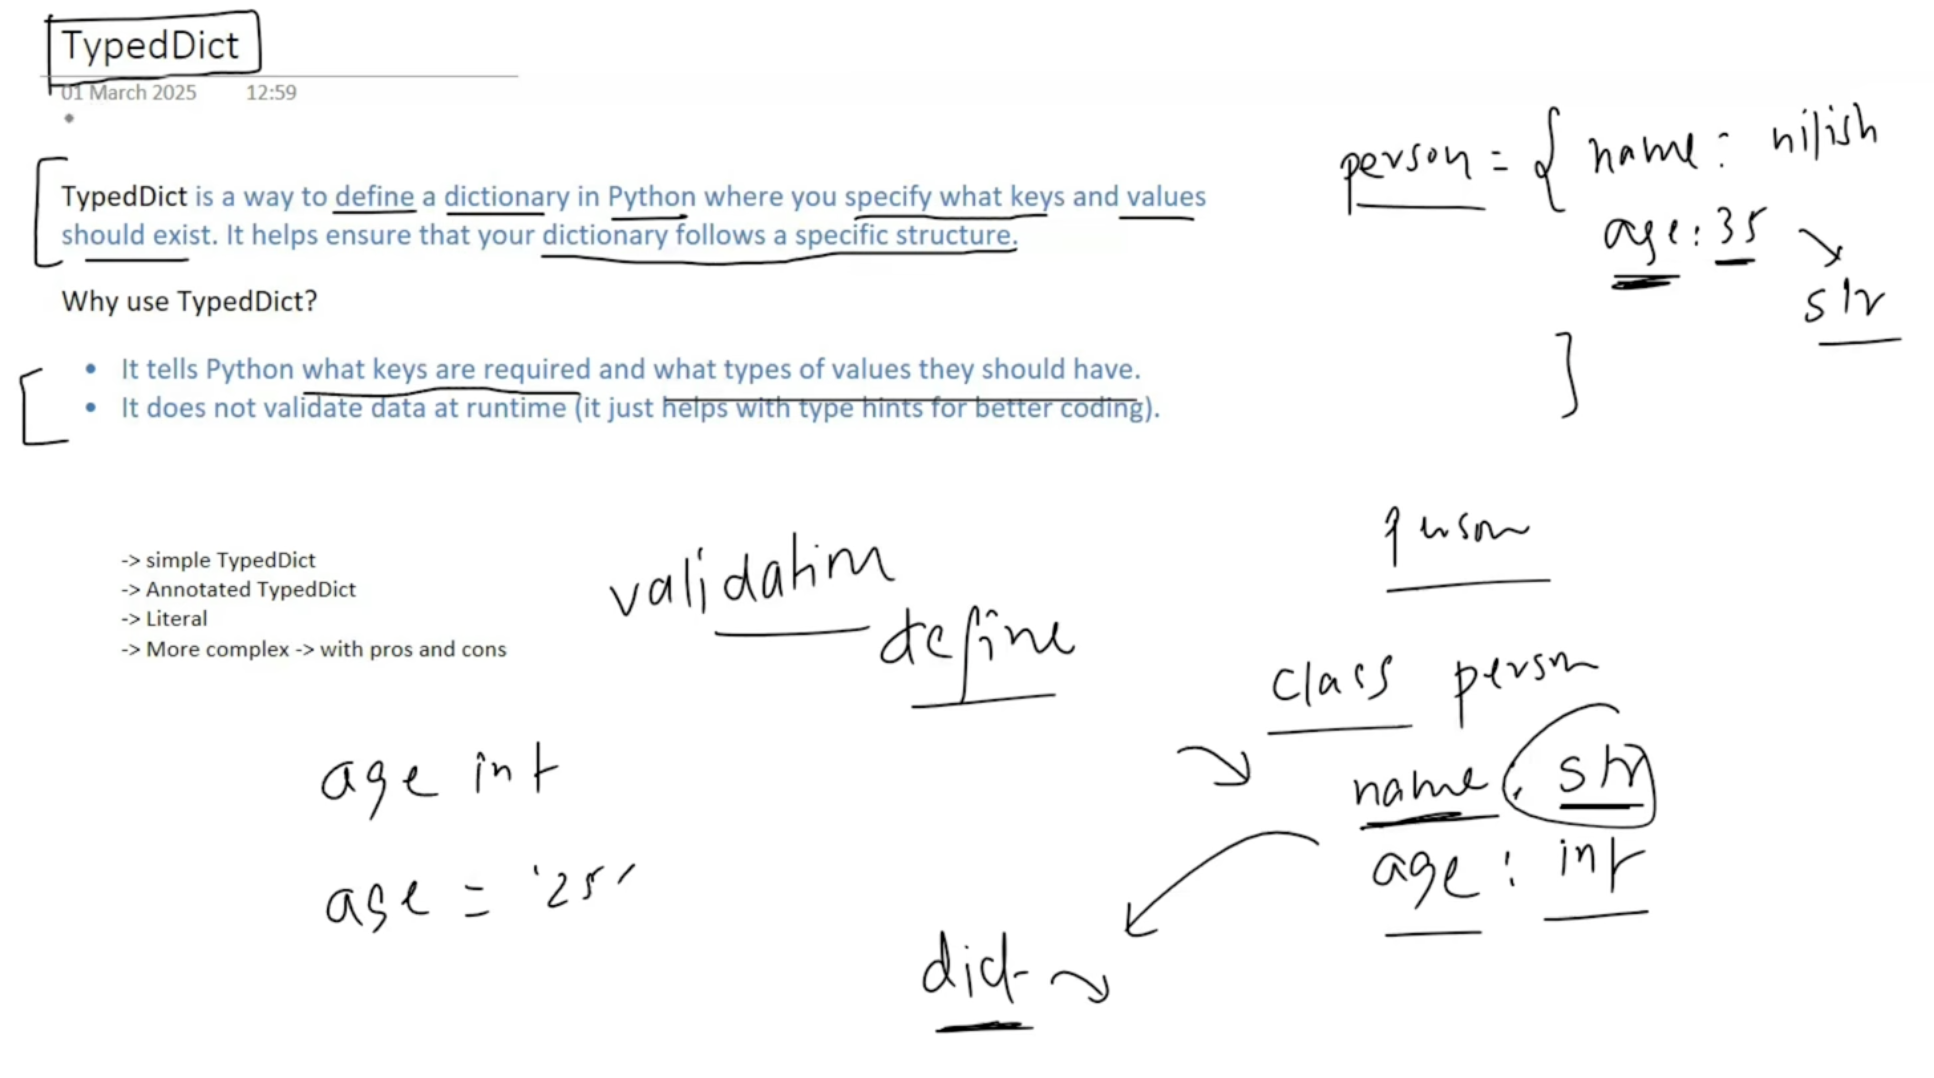

### Structure Output with TypedDict

In [2]:
from typing import TypedDict, Annotated, Optional, Literal
from langchain_ollama import OllamaLLM

model = OllamaLLM(model="llama3.2")

class Review(TypedDict):
    key_themes: Annotated[list[str], "Write down all the key themes discussed in the review in a list"]
    summary: Annotated[str, "A brief summary of the review"]
    sentiment: Annotated[Literal["pos", "neg"], "Return sentiment of the review either negative, positive or neutral"]
    pros: Annotated[Optional[list[str]], "Write down all the pros inside a list"]
    cons: Annotated[Optional[list[str]], "Write down all the cons inside a list"]
    name: Annotated[Optional[str], "Write the name of the reviewer"]

structured_model = model.with_structured_output(Review)

result = structured_model.invoke("""I recently upgraded to the Samsung Galaxy S24 Ultra, and I must say, it’s an absolute powerhouse! The Snapdragon 8 Gen 3 processor makes everything lightning fast—whether I’m gaming, multitasking, or editing photos. The 5000mAh battery easily lasts a full day even with heavy use, and the 45W fast charging is a lifesaver.

The S-Pen integration is a great touch for note-taking and quick sketches, though I don't use it often. What really blew me away is the 200MP camera—the night mode is stunning, capturing crisp, vibrant images even in low light. Zooming up to 100x actually works well for distant objects, but anything beyond 30x loses quality.

However, the weight and size make it a bit uncomfortable for one-handed use. Also, Samsung’s One UI still comes with bloatware—why do I need five different Samsung apps for things Google already provides? The $1,300 price tag is also a hard pill to swallow.

Pros:
Insanely powerful processor (great for gaming and productivity)
Stunning 200MP camera with incredible zoom capabilities
Long battery life with fast charging
S-Pen support is unique and useful
                                 
Review by Nitish Singh
""")

print(result)

NotImplementedError: 

# 2. Pydantic

* ✅ Runtime validation — actually checks types and values when used.

* 🔄 Can convert types automatically ("42" → 42).

* 📋 Provides rich features like default values, validators, JSON export, etc.

### Demo Pydantic

In [25]:
from pydantic import BaseModel, EmailStr, Field
from typing import Optional

class Student(BaseModel):
    name: str
    age: int
    grade: Optional[int] = None
    email: EmailStr
    cgpa: float = Field(default=5.0, gt=0.0, lt=10.0)

new_student = Student(name="Aadish", age="20", email="aadish@example.com", cgpa=7) # Implicitly converts age to int
new_student_1 = {'name': 'Aadish', 'age': 20, 'grade': 10, 'email': "aadish@example.com"}

print(new_student)
print(new_student_1)

student_dict = dict(new_student_1)

print(student_dict['grade'])

name='Aadish' age=20 grade=None email='aadish@example.com' cgpa=7.0
{'name': 'Aadish', 'age': 20, 'grade': 10, 'email': 'aadish@example.com'}
10


### Structure Output with Pydantic

In [29]:
from typing import TypedDict, Annotated, Optional, Literal
from pydantic import BaseModel, Field
from langchain_ollama import OllamaLLM

model = OllamaLLM(model="llama3.2") #OpenAI model supports structured output

class Review(BaseModel):
    key_themes: list[str] = Field(description="Write down all the key themes discussed in the review in a list")
    summary: str = Field(description="A brief summary of the review")
    sentiment: Literal["pos", "neg"] = Field(description="Return sentiment of the review either negative, positive or neutral")
    pros: Optional[list[str]] = Field(default=None, description="Write down all the pros inside a list")
    cons: Optional[list[str]] = Field(default=None, description="Write down all the cons inside a list")
    name: Optional[str] = Field(default=None, description="Write the name of the reviewer")

structured_model = model.with_structured_output(Review)

result = structured_model.invoke("""I recently upgraded to the Samsung Galaxy S24 Ultra, and I must say, it’s an absolute powerhouse! The Snapdragon 8 Gen 3 processor makes everything lightning fast—whether I’m gaming, multitasking, or editing photos. The 5000mAh battery easily lasts a full day even with heavy use, and the 45W fast charging is a lifesaver.

The S-Pen integration is a great touch for note-taking and quick sketches, though I don't use it often. What really blew me away is the 200MP camera—the night mode is stunning, capturing crisp, vibrant images even in low light. Zooming up to 100x actually works well for distant objects, but anything beyond 30x loses quality.

However, the weight and size make it a bit uncomfortable for one-handed use. Also, Samsung’s One UI still comes with bloatware—why do I need five different Samsung apps for things Google already provides? The $1,300 price tag is also a hard pill to swallow.

Pros:
Insanely powerful processor (great for gaming and productivity)
Stunning 200MP camera with incredible zoom capabilities
Long battery life with fast charging
S-Pen support is unique and useful
                                 
Review by Nitish Singh
""")

print(result.name)

NotImplementedError: 

# 3. JSON

### Demo JSON

In [30]:
{
    "title": "student",
    "description": "schema about students",
    "type": "object",
    "properties":{
        "name":"string",
        "age":"integer"
    },
    "required":["name"]
}

{'title': 'student',
 'description': 'schema about students',
 'type': 'object',
 'properties': {'name': 'string', 'age': 'integer'},
 'required': ['name']}

### Structure Output with JSON

In [31]:
from langchain_ollama import OllamaLLM

model = OllamaLLM(model="llama3.2") #OpenAI model supports structured output

# schema
json_schema = {
  "title": "Review",
  "type": "object",
  "properties": {
    "key_themes": {
      "type": "array",
      "items": {
        "type": "string"
      },
      "description": "Write down all the key themes discussed in the review in a list"
    },
    "summary": {
      "type": "string",
      "description": "A brief summary of the review"
    },
    "sentiment": {
      "type": "string",
      "enum": ["pos", "neg"],
      "description": "Return sentiment of the review either negative, positive or neutral"
    },
    "pros": {
      "type": ["array", "null"],
      "items": {
        "type": "string"
      },
      "description": "Write down all the pros inside a list"
    },
    "cons": {
      "type": ["array", "null"],
      "items": {
        "type": "string"
      },
      "description": "Write down all the cons inside a list"
    },
    "name": {
      "type": ["string", "null"],
      "description": "Write the name of the reviewer"
    }
  },
  "required": ["key_themes", "summary", "sentiment"]
}


structured_model = model.with_structured_output(json_schema)

result = structured_model.invoke("""I recently upgraded to the Samsung Galaxy S24 Ultra, and I must say, it’s an absolute powerhouse! The Snapdragon 8 Gen 3 processor makes everything lightning fast—whether I’m gaming, multitasking, or editing photos. The 5000mAh battery easily lasts a full day even with heavy use, and the 45W fast charging is a lifesaver.

The S-Pen integration is a great touch for note-taking and quick sketches, though I don't use it often. What really blew me away is the 200MP camera—the night mode is stunning, capturing crisp, vibrant images even in low light. Zooming up to 100x actually works well for distant objects, but anything beyond 30x loses quality.

However, the weight and size make it a bit uncomfortable for one-handed use. Also, Samsung’s One UI still comes with bloatware—why do I need five different Samsung apps for things Google already provides? The $1,300 price tag is also a hard pill to swallow.

Pros:
Insanely powerful processor (great for gaming and productivity)
Stunning 200MP camera with incredible zoom capabilities
Long battery life with fast charging
S-Pen support is unique and useful
                                 
Review by Nitish Singh
""")

print(result)

NotImplementedError: 